# Setting up notebook


In [7]:
# Magic command below to enable interactivity in the JupyterLab interface
%matplotlib ipympl
# Some basic imports that are useful
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

This cell imports the necessary libraries

## Function to find the vertices of a regular polygon 


In [8]:
# Function to return the fractional part of a number
def frac(number):
    return number - int(number)

# Function that returns the vertices of an n-sided regular polygon with one vertex at (1,0)
def regPoly(n):
    # Declaring terms
    value =[]
    angle = 2*np.pi/n

    # Looping through all the vertices and finding them using roots of unity equation
    for i in range(n):
        x = np.cos(angle * i)
        y = np.sin(angle * i)
        value.append(x)
        value.append(y)
    return value


The above cell defines a function to find the fractional part of a number and another function to find th vertices of a regular n sided polygon. THis is done using the concept of roots of unity.

## Function to find line joining two points

In [9]:
def get_line_points(x1, y1, x2, y2, m, l):
    
    # Initialize an empty list to store the points on the line
    points = []
    
    # Loop through the required number of points
    for i in range(m):
        # Calculate the x and y coordinates of the point on the line using linear interpolation
        x = x1 + (x2 - x1) * i / l
        y = y1 + (y2 - y1) * i / l
        
        # Add the x and y coordinates to the list of points
        points.append(x)
        points.append(y)
        
    # Return the list of points
    return points



The above cell defines a function to find m number of points between any two given points. This defines a very simple function that finds points using a direct linear equation.

In [10]:
# Number of points that's to be plotted
N = 5040

# Defining a function to find the array of points required to construct the regular polygon of n sides
def polyPoints(n):
    # Declaring the variables
    x_values = []
    y_values = []

    # Looping through all the vertex pairs to add the lines between them
    for i in range(n-1):
        xj = get_line_points(regPoly(n)[::2][i], regPoly(n)[1::2][i], regPoly(n)[::2][i+1], regPoly(n)[1::2][i+1], int(N/n), int(N/n))
        x_values.append(xj[::2])
        y_values.append(xj[1::2])

    # Appending the last line between the first and the last vertex
    x_values.append(get_line_points(regPoly(n)[::2][n-1], regPoly(n)[1::2][n-1], regPoly(n)[::2][0], regPoly(n)[1::2][0], int(N/n)+1, int(N/n))[::2])
    y_values.append(get_line_points(regPoly(n)[::2][n-1], regPoly(n)[1::2][n-1], regPoly(n)[::2][0], regPoly(n)[1::2][0], int(N/n)+1, int(N/n))[1::2])

    # Conversion to array datatype for animation
    x_values = np.array([item for sublist in x_values for item in sublist])
    y_values = np.array([item for sublist in y_values for item in sublist])

    return x_values, y_values


The above cell combines all the function defined till now to return an array of points that can be used to plot an n sided regular polyogn with one of its vertices as (1,0)

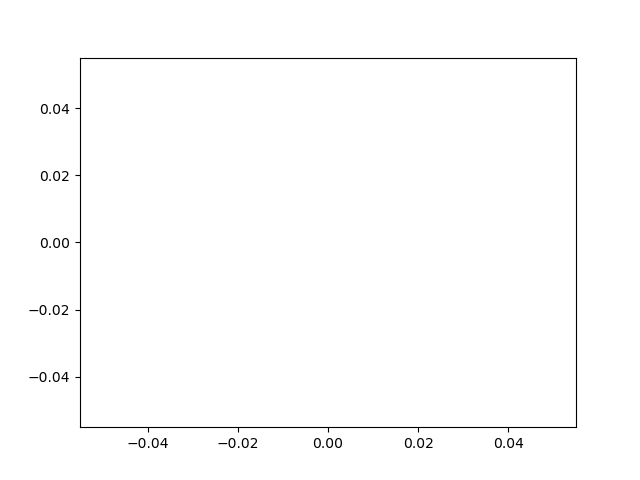

ERROR:tornado.application:Exception in callback <bound method TimerBase._on_timer of <matplotlib.backends.backend_webagg_core.TimerTornado object at 0x7f6d7faa6a60>>
Traceback (most recent call last):
  File "/home/pika/anaconda3/lib/python3.9/site-packages/tornado/ioloop.py", line 905, in _run
    return self.callback()
  File "/home/pika/anaconda3/lib/python3.9/site-packages/matplotlib/backend_bases.py", line 1198, in _on_timer
    ret = func(*args, **kwargs)
  File "/home/pika/anaconda3/lib/python3.9/site-packages/matplotlib/animation.py", line 1408, in _step
    still_going = super()._step(*args)
  File "/home/pika/anaconda3/lib/python3.9/site-packages/matplotlib/animation.py", line 1107, in _step
    self._draw_next_frame(framedata, self._blit)
  File "/home/pika/anaconda3/lib/python3.9/site-packages/matplotlib/animation.py", line 1126, in _draw_next_frame
    self._draw_frame(framedata)
  File "/home/pika/anaconda3/lib/python3.9/site-packages/matplotlib/animation.py", line 1720, 

In [11]:
# Defining the global variables for the animation
fig, ax = plt.subplots()
xdata, ydata = [], []
ln, = ax.plot([], [], 'r')

# Function to define the space for the plot
def init():
    ax.set_xlim(-1.2, 1.2)
    ax.set_ylim(-1.2, 1.2)
    return ln,

# Function to update the frame
def update(frame):
    xdata, ydata = morph(frame)
    ln.set_data(xdata, ydata)
    return ln,


The above cell defines various parameters for the proper plotting of the animationnd the update function used to update the animation.

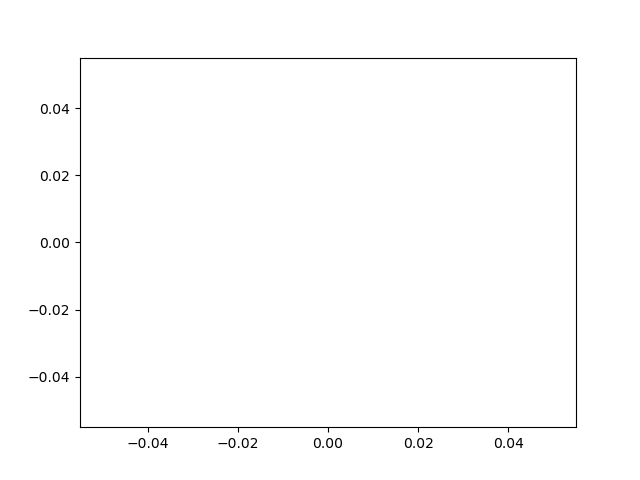

In [12]:
# Defining the morph function to gradually change the vectors to generate the animation
def morph(alpha):

    # Conditionally changing between multiple polygons depending on the time of the frame
    if alpha > 0 and alpha < 1: 
        x2, y2 = polyPoints(3)
        x1, y1 = polyPoints(4)
    if alpha > 1 and alpha < 2: 
        x2, y2 = polyPoints(4)
        x1, y1 = polyPoints(5)
    if alpha > 2 and alpha < 3: 
        x2, y2 = polyPoints(5)
        x1, y1 = polyPoints(6)
    if alpha > 3 and alpha < 4: 
        x2, y2 = polyPoints(6)
        x1, y1 = polyPoints(7)
    if alpha > 4 and alpha < 5: 
        x2, y2 = polyPoints(7)
        x1, y1 = polyPoints(8)
    if alpha > 5 and alpha < 6: 
        x2, y2 = polyPoints(8)
        x1, y1 = polyPoints(9)
    if alpha > 6 and alpha < 7: 
        x2, y2 = polyPoints(9)
        x1, y1 = polyPoints(10)

    # Final morph function that causes the animation    
    xm = frac(alpha) * x1 + (1 - frac(alpha)) * x2
    ym = frac(alpha) * y1 + (1 - frac(alpha)) * y2
    return xm, ym

# Animation
ani = FuncAnimation(fig, update, frames=np.linspace(0, 7, 128*7), init_func=init, blit=True, interval=10, repeat=True)
plt.show()


This cell contains the morph function that transitions between the different sets of array passed for different polygons.Then it animates the final result including all the functions.